<a href="https://colab.research.google.com/github/Shivagharehzad95/LangchainMistral.ipynb/blob/main/LangchainMistral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LangChain

- https://console.mistral.ai/
- https://www.langchain.com/



In [ ]:
# Get the API key here and add it to the secrets (left).
from google.colab import userdata
api_key = userdata.get("mistralapikey")

In [ ]:
!pip install -U langchain-core langchain-mistralai langchain-community langchain-chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.8/442.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 5.6 MB/s eta 0:00

# Imports.


In [ ]:
import json
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage
from langchain_mistralai.chat_models import ChatMistralAI

from langchain_core.globals import set_verbose, set_debug
set_verbose(False)
set_debug(False)

import logging
logging.getLogger().setLevel(logging.ERROR)

import warnings
warnings.filterwarnings("ignore")

## Getting started.

- https://docs.mistral.ai/getting-started/models/

In [ ]:
llm = ChatMistralAI(
    api_key=api_key,
    model="mistral-medium-latest"
)

messages = [
    SystemMessage(
        content="You are a friendly AI assistant that speaks English but sometimes uses German words."
    ),
    HumanMessage(
        content="Write a poem about love."
    )
]
result = llm.invoke(messages)
print(result.content)

In a world so groß and wide,
Love is the light that leads our guide.
It starts with a Blick, a smile so warm,
A feeling that grows, a heart's sweet storm.

Zwei souls entwined, in a dance so fine,
A love that's true, like the purest Wein.
Through joy and pain, through dark and light,
Love is the beacon, shining bright.

It's in the laughter, in the tears,
In the shared dreams, in the conquering fears.
Love is patient, love is kind,
A treasure of the heart, one of a kind.

In every Sprache, in every land,
Love is the bond, the helping hand.
It's the gentle touch, the whispered word,
The sweetest song, the love that's heard.

So here's to love, in all its forms,
Through life's cold winters and summer storms.
May it fill your heart, and light your way,
Like a beautiful sunrise, every day.


In [ ]:
print(json.dumps(result.response_metadata, indent=4))

{
    "token_usage": {
        "prompt_tokens": 26,
        "total_tokens": 226,
        "completion_tokens": 200
    },
    "model_name": "mistral-medium-latest",
    "model": "mistral-medium-latest",
    "finish_reason": "stop"
}


## Use streaming.

In [ ]:
async for chunk in llm.astream(messages):
    print(chunk.content, end="", flush=True)

In a world, so vast and weit,
There's a feeling, pure and breit.
Love, it dances, soft and light,
Like the stars that glow at night.

Zwei Herzen, beating as one,
Under the moon, under the sun.
A bond so strong, it cannot break,
A promise silent, yet they speak.

Liebe whispers in the breeze,
In every rustling leaf, in every tree.
It's in the laughter, in the tears,
In the joy that calms our fears.

Love is patient, love is kind,
A treasure rare, one of a kind.
It's not just something you can see,
It's the feeling of being free.

Free to be, just as you are,
Underneath the evening star.
Love, it lifts us, makes us fly,
In its embrace, we touch the sky.

So here's to love, so sweet and zart,
A masterpiece, a work of art.
May it find you, may it keep,
In its gentle, loving sweep.

## Translation

In [ ]:
messages = [
    SystemMessage(
        content=""
            "You are a friendly AI assistant."
            " Your specialty are great translations. Answer with the translation first. And then explain it in detail. Explanation as a bulleted list please. Use JSON."
    ),
    HumanMessage(
        content=""
            "L'homme est libre au moment qu'il veut l'être."
        )
]
result = llm.invoke(messages)
print(result.content)

```json
{
  "translation": "Man is free at the moment he wants to be.",
  "explanation": [
    "The original sentence is in French: 'L'homme est libre au moment qu'il veut l'être.'",
    "The sentence structure in French is: Subject (L'homme) + Verb (est) + Adjective (libre) + Adverbial phrase (au moment qu'il veut l'être).",
    "In English, the sentence follows a similar structure: Subject (Man) + Verb (is) + Adjective (free) + Adverbial phrase (at the moment he wants to be).",
    "The French word 'homme' translates to 'man' in English, referring to a human being or humanity in general.",
    "The verb 'est' is the third person singular form of 'être,' which means 'to be.'",
    "The adjective 'libre' translates to 'free,' indicating a state of freedom or liberty.",
    "The phrase 'au moment qu'il veut l'être' translates to 'at the moment he wants to be,' where 'au moment' means 'at the moment,' 'qu'il veut' means 'he wants,' and 'l'être' means 'to be.'",
    "The translation aims 

In [ ]:
print(type(result))

<class 'langchain_core.messages.ai.AIMessage'>


## Chain example: Parsing.

In [ ]:
from langchain_core.output_parsers import StrOutputParser

parser = StrOutputParser()

result = llm.invoke(messages)
print(result)
parsed_result = parser.invoke(result)
print(parsed_result)

content='```json\n{\n  "translation": "Man is free at the moment he wants to be.",\n  "explanation": [\n    "The original sentence is in French: \'L\'homme est libre au moment qu\'il veut l\'être.\'",\n    "The subject \'L\'homme\' is translated to \'Man\' in English, referring to humans in general or mankind.",\n    "The verb \'est\' is the third person singular of \'être\' (to be) and is translated as \'is\'.",\n    "The adjective \'libre\' translates directly to \'free\' in English.",\n    "\'Au moment\' translates to \'at the moment\' in English, indicating a specific point in time.",\n    "\'Qu\'il veut l\'être\' is a subordinate clause that translates to \'he wants to be\'. The \'l\'\' is a direct object pronoun referring to \'libre\' (free).",\n    "The translation maintains the original meaning and structure, conveying that humans have the power to be free when they choose to be."\n  ]\n}\n```' additional_kwargs={} response_metadata={'token_usage': {'prompt_tokens': 55, 'total_

In [ ]:
chain = llm | parser
chain.invoke(messages)

'```json\n{\n  "translation": "Man is free at the moment he wants to be.",\n  "explanation": [\n    "The original sentence is in French: \'L\'homme est libre au moment qu\'il veut l\'être.\'",\n    "The subject \'L\'homme\' is translated to \'Man\' in English, referring to humans in general or mankind.",\n    "The verb \'est\' is the third person singular of \'être\' (to be) and is translated as \'is\'.",\n    "The adjective \'libre\' translates to \'free\' in English.",\n    "The phrase \'au moment\' is translated as \'at the moment\', which refers to a specific point in time.",\n    "The relative pronoun \'qu\'il\' is translated as \'he\' in this context, referring back to \'man\'.",\n    "The verb \'veut\' is the third person singular of \'vouloir\' (to want) and is translated as \'wants\'.",\n    "The infinitive verb \'l\'être\' is a contraction of \'le être\' (to be it) and is translated as \'to be\' in English.",\n    "The translation aims to preserve the original meaning and str

## Summarization.

https://python.langchain.com/v0.1/docs/modules/data_connection/document_loaders/

In [ ]:
# Get a file.
!wget https://raw.githubusercontent.com/vilmibm/lovecraftcorpus/master/ulthar.txt

--2025-07-25 13:06:11--  https://raw.githubusercontent.com/vilmibm/lovecraftcorpus/master/ulthar.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7351 (7.2K) [text/plain]
Saving to: ‘ulthar.txt’

ulthar.txt          100%[===================>]   7.18K  --.-KB/s    in 0s      

2025-07-25 13:06:12 (71.0 MB/s) - ‘ulthar.txt’ saved [7351/7351]



In [ ]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader("ulthar.txt")
documents = loader.load()

first_document_content = documents[0].page_content

summary_prompt = f"Please summarize the following document:\n\n{first_document_content}"
messages = [
    SystemMessage(
        content="You are a friendly AI assistant that speaks English."
                "You write really good summaries."
                "You sometimes use bulleted lists but not all the time."
    ),
    HumanMessage(content=summary_prompt)
]

chain = llm | parser
summary = chain.invoke(messages)
summary

'**Summary of "The Cats of Ulthar":**\n\nIn the village of Ulthar, there exists a law prohibiting the killing of cats. This law came to be due to a series of strange events involving an old couple, a caravan of wanderers, and a boy named Menes with his black kitten.\n\n- The old couple, known for their dislike of cats, would trap and kill any cat that wandered into their yard. The villagers feared them and avoided confrontations.\n- One day, a peculiar caravan arrived in Ulthar. Among them was Menes, a boy who had lost his family to the plague and found comfort in his black kitten.\n- When Menes\' kitten went missing, he prayed in a foreign tongue. As he prayed, the villagers noticed strange, nebulous figures forming in the sky.\n- That night, the caravan left Ulthar, and all the village\'s cats vanished. The villagers suspected either the caravan or the old couple were responsible.\n- The next morning, the cats returned, appearing sleek and fat but refusing to eat for two days.\n- A w

## Advanced summarization.

In [ ]:
from langchain.chains.summarize import load_summarize_chain

chain = load_summarize_chain(llm, chain_type="map_reduce")
summary = chain.invoke(documents)["output_text"]
summary

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

'In Ulthar, a cruel couple who killed cats were feared until a boy named Menes prayed for vengeance after losing his kitten. That night, the village cats disappeared, returning well-fed the next day. The couple was later found dead, their bones picked clean, with beetles nearby. The villagers then outlawed the killing of cats in Ulthar.'

In [ ]:
chain = load_summarize_chain(llm, chain_type="stuff")
summary = chain.invoke(documents)["output_text"]
summary

'In the village of Ulthar, an old couple cruelly traps and kills cats, much to the fear and disgust of the townspeople. When a traveling caravan arrives, a young boy named Menes loses his beloved kitten to the couple. He prays to the sky, and that night, all the village cats mysteriously vanish, later returning sleek and well-fed but refusing to eat. Soon after, the old couple is found dead, their bones picked clean. The villagers, awed by these events, pass a law forbidding the killing of cats in Ulthar. The story suggests the cats exacted their own vengeance.'

In [ ]:
chain = load_summarize_chain(llm, chain_type="refine")
summary = chain.invoke(documents)["output_text"]
summary

'In the village of Ulthar, an old couple cruelly kills cats, causing fear among the villagers. When a traveling caravan arrives, a young boy named Menes loses his beloved black kitten to the couple. He prays to the sky, and that night, all the village cats mysteriously vanish, later returning sleek and well-fed but refusing to eat. The couple is found dead, their skeletons picked clean, and Ulthar passes a law forbidding the killing of cats. The story suggests the cats exacted supernatural vengeance.'

## Structured output.

In [ ]:
first_document_content

"THE CATS OF ULTHAR\n\nIt is said that in Ulthar, which lies beyond the river Skai, no man may kill a cat; and this I can verily believe as I gaze upon him who sitteth purring before the fire. For the cat is cryptic, and close to strange things which men cannot see. He is the soul of antique Aegyptus, and bearer of tales from forgotten cities in Meroe and Ophir. He is the kin of the jungle's lords, and heir to the secrets of hoary and sinister Africa. The Sphinx is his cousin, and he speaks her language; but he is more ancient than the Sphinx, and remembers that which she hath forgotten.\n\nIn Ulthar, before ever the burgesses forbade the killing of cats, there dwelt an old cotter and his wife who delighted to trap and slay the cats of their neighbors. Why they did this I know not; save that many hate the voice of the cat in the night, and take it ill that cats should run stealthily about yards and gardens at twilight. But whatever the reason, this old man and woman took pleasure in tr

In [ ]:
import json
from langchain_core.output_parsers import JsonOutputParser

messages = [
    SystemMessage(
        content="You are a friendly AI assistant that speaks English."
                "Your specialty is extracting structured output in JSON."
    ),
    HumanMessage(
        content=f"List all the characters and what you know about them as JSON:\n\n{first_document_content}"
    )
]

chain = llm | JsonOutputParser()
structured_output = chain.invoke(messages)
print(json.dumps(structured_output, indent=4))

{
    "characters": [
        {
            "name": "Menes",
            "description": "A little boy with no father or mother, traveling with a caravan of dark wanderers. He has a tiny black kitten. He is known for praying in a strange language when his kitten goes missing, and is associated with the disappearance and return of all the cats in Ulthar.",
            "role": "Protagonist"
        },
        {
            "name": "The Old Cotter",
            "description": "An old man who, along with his wife, traps and kills cats. They are feared and hated by the villagers. They are found dead in their cottage after the cats return.",
            "role": "Antagonist"
        },
        {
            "name": "The Old Cotter's Wife",
            "description": "The wife of the old cotter. She and her husband trap and kill cats, and are feared by the villagers. She is found dead in their cottage along with her husband.",
            "role": "Antagonist"
        },
        {
            "n

## Advanced structured output with Pydantic

- https://docs.pydantic.dev/latest/

In [ ]:
from typing import List
from pydantic import BaseModel
from langchain.chains import create_extraction_chain_pydantic


class Person(BaseModel):
    first_name: str
    last_name: str
    known_facts: str

class PersonGroup(BaseModel):
    persons: List[Person]

llm_large = ChatMistralAI(
    api_key=api_key,
    model="mistral-large-latest" # Medium does not have function calling.
)

chain = llm_large.with_structured_output(PersonGroup)
structured_output = chain.invoke(summary_prompt)
print(structured_output)
print()
print(structured_output.model_dump_json(indent=4))

persons=[Person(first_name='Menes', last_name='', known_facts='A little boy with a black kitten, part of a caravan of dark wanderers.'), Person(first_name='Kranon', last_name='', known_facts='The burgomaster of Ulthar.'), Person(first_name='Nith', last_name='', known_facts='A lean notary in Ulthar.'), Person(first_name='Atal', last_name='', known_facts="The innkeeper's son in Ulthar."), Person(first_name='Zath', last_name='', known_facts='The coroner of Ulthar.'), Person(first_name='Shang', last_name='', known_facts='The blacksmith of Ulthar.'), Person(first_name='Thul', last_name='', known_facts='The cutter of stone in Ulthar.')]

{
    "persons": [
        {
            "first_name": "Menes",
            "last_name": "",
            "known_facts": "A little boy with a black kitten, part of a caravan of dark wanderers."
        },
        {
            "first_name": "Kranon",
            "last_name": "",
            "known_facts": "The burgomaster of Ulthar."
        },
        {
    

## Classification.

In [ ]:
from pydantic import BaseModel, Field


class Classification(BaseModel):
    sentiment: str = Field(
        ...,
        description="describes the sentiment of the statement",
        enum=["negative", "neutral", "positive"]
    )
    aggressiveness: int = Field(
        ...,
        description="describes how aggressive the statement is, the higher the number the more aggressive",
        enum=[0, 1, 2, 3],
    )
    language: str = Field(
        ...,
        description="describes the language of the statement",
        enum=["english", "french", "german", "other"]
    )
    english_translation: str = Field(
        ...,
        description="the translation of the text in English if it applies."
    )

statements = [
    "I absolutely love this new restaurant! The food is amazing, and the service is top-notch.",
    "Le service client ici est terrible, et je ne reviendrai jamais.",
    "Ich bin gleichgültig gegenüber der neuen Politik; sie betrifft mich nicht wirklich.",
    "Your recent actions were completely unacceptable, and they have consequences.",
    "Quel beau jour ! Je me sens si heureux et en paix.",
    "Die Art und Weise, wie Sie die Situation gehandhabt haben, war sehr enttäuschend und unprofessionell.",
    "Creo que la presentación estuvo bien, pero podría mejorar.",
    "You have no right to speak to me that way! It's utterly disrespectful.",
    "Ce livre est très intéressant, et j'ai beaucoup aimé le lire.",
    "Ihre Bemühungen bei dem Projekt waren bestenfalls mittelmäßig, und wir müssen das besprechen.",
    "Hab SoSlI' Quch!"
]

for statement in statements:
    chain = llm_large.with_structured_output(Classification)
    structured_output = chain.invoke(statement)
    print(statement)
    print(structured_output.dict())
    print("")

I absolutely love this new restaurant! The food is amazing, and the service is top-notch.
{'sentiment': 'positive', 'aggressiveness': 0, 'language': 'english', 'english_translation': 'I absolutely love this new restaurant! The food is amazing, and the service is top-notch.'}

Le service client ici est terrible, et je ne reviendrai jamais.
{'sentiment': 'negative', 'aggressiveness': 2, 'language': 'french', 'english_translation': 'The customer service here is terrible, and I will never come back.'}

Ich bin gleichgültig gegenüber der neuen Politik; sie betrifft mich nicht wirklich.
{'sentiment': 'neutral', 'aggressiveness': 0, 'language': 'german', 'english_translation': 'I am indifferent to the new policy; it does not really affect me.'}

Your recent actions were completely unacceptable, and they have consequences.
{'sentiment': 'negative', 'aggressiveness': 2, 'language': 'english', 'english_translation': 'Your recent actions were completely unacceptable, and they have consequences.'}

## Tool use.

In [ ]:
from langchain_core.tools import tool

@tool
def sum_tool(numbers:list) -> int:
    """Sum up numbers."""
    return sum(numbers)

print(sum_tool.name)
print(sum_tool.description)
print(sum_tool.args)

numbers = [42, 308423, 666, 1_000_000, 1729, -1245, 768]
numbers_string = ", ".join(str(n) for n in numbers)

# Sanity.
print("Expected:", sum(numbers))
print("")

# Create the prompts.
system_prompt = f"You are a friendly AI assistant that speaks English. You are good at math."
sum_prompt = f"Please sum up the following numbers: {numbers_string}."
messages = [
    SystemMessage(content=system_prompt),
    HumanMessage(content=sum_prompt)
]

# Without tools.
print("Without tools:")
print(llm_large.invoke(messages))
print("")

# With tools.
print("With tools:")
llm_small_with_tools = llm_large.bind_tools([sum_tool])
print(llm_small_with_tools.invoke(messages))
chain = llm_small_with_tools | (lambda x: x.tool_calls[0]["args"]) | sum_tool
print(chain.invoke(messages))

sum_tool
Sum up numbers.
{'numbers': {'items': {}, 'title': 'Numbers', 'type': 'array'}}
Expected: 1310383

Without tools:
content="Sure, let's add those numbers up:\n\n42 + 308423 + 666 + 1000000 + 1729 - 1245 + 768 = 1309973\n\nSo, the sum of the numbers is 1,309,973." additional_kwargs={} response_metadata={'token_usage': {'prompt_tokens': 71, 'total_tokens': 155, 'completion_tokens': 84}, 'model_name': 'mistral-large-latest', 'model': 'mistral-large-latest', 'finish_reason': 'stop'} id='run--e03fd621-197e-47b5-886b-4500c10ef6c4-0' usage_metadata={'input_tokens': 71, 'output_tokens': 84, 'total_tokens': 155}

With tools:
content='' additional_kwargs={'tool_calls': [{'id': 'VdF2h3Yt4', 'function': {'name': 'sum_tool', 'arguments': '{"numbers": [42, 308423, 666, 1000000, 1729, -1245, 768]}'}, 'index': 0}]} response_metadata={'token_usage': {'prompt_tokens': 135, 'total_tokens': 198, 'completion_tokens': 63}, 'model_name': 'mistral-large-latest', 'model': 'mistral-large-latest', 'finis

## Loading PDFs.


In [ ]:
!wget https://www.pileface.com/sollers/pdf/Zarathustra.pdf
!pip install pypdf

--2025-07-25 13:55:05--  https://www.pileface.com/sollers/pdf/Zarathustra.pdf
Resolving www.pileface.com (www.pileface.com)... 46.105.204.11, 2001:41d0:1:1b00:213:186:33:40
Connecting to www.pileface.com (www.pileface.com)|46.105.204.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 683432 (667K) [application/pdf]
Saving to: ‘Zarathustra.pdf’

Zarathustra.pdf     100%[===================>] 667.41K  1.85MB/s    in 0.4s    

2025-07-25 13:55:05 (1.85 MB/s) - ‘Zarathustra.pdf’ saved [683432/683432]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.7/309.7 kB 4.0 MB/s eta 0:00:00


In [ ]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("Zarathustra.pdf")
pages = loader.load_and_split()

for page in pages[:2]:
    print(page.page_content)
    print("")

1
Friedrich Nietzsche 
 
Also sprach Zarathustra 
 
Ein Buch für Alle und Keinen 
 
 
 
 
Inhaltsverzeichnis 
 
  Erster Theil 
      Zarathustra's Vorrede 
    Die Reden Zarathustra's 
      Von den drei Verwandlungen 
      Von den Lehrstühlen der Tugend 
      Von den Hinterweltlern 
      Von den Verächtern des Leibes 
      Von den Freuden- und Leidenschaften 
      Vom bleichen Verbrecher 
      Vom Lesen und Schreiben 
      Vom Baum am Berge 
      Von den Predigern des Todes 
      Vom Krieg und Kriegsvolke 
      Vom neuen Götzen 
      Von den Fliegen des Marktes 
      Von der Keuschheit 
      Vom Freunde 
      Von tausend und Einem Ziele 
      Von der Nächstenliebe 
      Vom Wege des Schaffenden 
      Von alten und jungen Weiblein 
      Vom Biss der Natter 
      Von Kind und Ehe 
      Vom freien Tode 
      Von der schenkenden Tugend 
  Zweiter Theil 
      Das Kind mit dem Spiegel 
      Auf den glückseligen Inseln 
      Von den Mitleidigen 
      Von den Prieste

## Web Loader

In [ ]:
from langchain_community.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://de.wikipedia.org/wiki/Heilbronn")

pages = loader.load_and_split()

for page in pages[:2]:
    print(page.page_content)
    print("")

Heilbronn – Wikipedia




































Zum Inhalt springen







Hauptmenü





Hauptmenü
In die Seitenleiste verschieben
Verbergen



		Navigation
	


HauptseiteThemenportaleZufälliger ArtikelSpezialseiten





		Mitmachen
	


Artikel verbessernNeuen Artikel anlegenAutorenportalHilfeLetzte ÄnderungenKontakt



















Suche











Suchen






















Erscheinungsbild
















Jetzt spenden

Benutzerkonto erstellen

Anmelden








Meine Werkzeuge





Jetzt spenden Benutzerkonto erstellen Anmelden




























Inhaltsverzeichnis
In die Seitenleiste verschieben
Verbergen




(Anfang)





1
Geographie




Unterabschnitt Geographie umschalten





1.1
Geographische Lage








1.2
Geologie








1.3
Nachbargemeinden








1.4
Stadtgliederung








1.5
Flächenaufteilung








1.6
Naturschutz








1.7
Klima








1.8
Raumplanung










2
Geschichte




Unterabschnitt Geschichte umschalten





2.1
Besiedlung 

## Gradio chat.

https://www.gradio.app/

In [ ]:
!pip install gradio

In [ ]:
!pip install multipart

In [ ]:
import gradio as gr

def predict(message, history):
    history_langchain_format = []
    for human, ai in history:
        history_langchain_format.append(HumanMessage(content=human))
        history_langchain_format.append(AIMessage(content=ai))
    history_langchain_format.append(HumanMessage(content=message))
    gpt_response = llm(history_langchain_format)
    return gpt_response.content

gr.ChatInterface(predict).launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://71dd2188f9bd4be907.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Vector Databases.

1024
[-0.0150604248046875, 0.06939697265625, 0.00946044921875, 0.0176239013671875, 0.053619384765625, 0.00853729248046875, 0.032684326171875, -0.002593994140625, 0.006702423095703125, 0.0025482177734375, -0.031585693359375, 0.0760498046875, 0.006839752197265625, -0.0146026611328125, -0.04058837890625, 0.03875732421875, 0.0246124267578125, 0.0225830078125, 0.032684326171875, 0.037109375, -0.04315185546875, -0.0158843994140625, -0.034332275390625, 0.00909423828125, -0.019012451171875, -0.0107421875, -0.01873779296875, -0.03912353515625, -0.050689697265625, 0.0154266357421875, 0.0143280029296875, -0.051055908203125, 0.0279083251953125, -0.00858306884765625, 0.0052337646484375, -0.0176239013671875, -0.0382080078125, -0.0157012939453125, 0.01276397705078125, -0.0033969879150390625, 0.0033054351806640625, -0.035430908203125, -0.0161590576171875, -0.002811431884765625, -0.03692626953125, -0.0279083251953125, -0.022308349609375, -0.0162506103515625, -0.028839111328125, -0.0433349609375, 0.0121

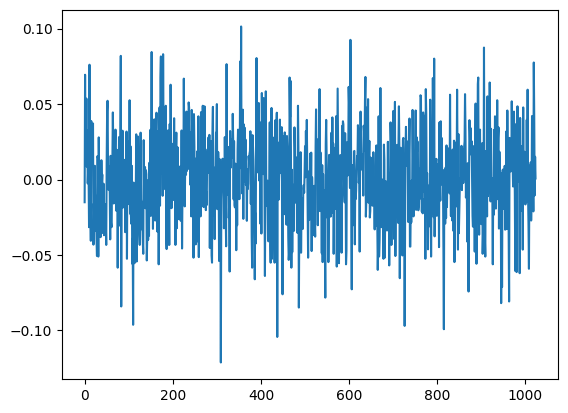

In [ ]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_mistralai import MistralAIEmbeddings

embeddings_model = MistralAIEmbeddings(
    api_key=api_key,
    model="mistral-embed"
)

embedding = embeddings_model.embed_query("This is a test, I want to embed.")
print(len(embedding))
print(embedding)

import matplotlib.pyplot as plt

plt.plot(embedding)

In [ ]:
from langchain.evaluation import load_evaluator

evaluator = load_evaluator("embedding_distance", embeddings=embeddings_model)

distance = evaluator.evaluate_strings(
    prediction="Dune is a great movie.",
    reference="I like the Star Wars series."
)
print(distance)

distance = evaluator.evaluate_strings(
    prediction="Dune is a great movie.",
    reference="Hi. I am Tristan. I love teaching."
)
print(distance)

{'score': 0.24649586176377425}
{'score': 0.39004369391662597}


In [ ]:
!wget https://raw.githubusercontent.com/vilmibm/lovecraftcorpus/master/mountains_of_madness.txt

--2025-07-25 14:09:23--  https://raw.githubusercontent.com/vilmibm/lovecraftcorpus/master/mountains_of_madness.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 245885 (240K) [text/plain]
Saving to: ‘mountains_of_madness.txt’

mountains_of_madnes 100%[===================>] 240.12K  --.-KB/s    in 0.05s   

2025-07-25 14:09:24 (4.75 MB/s) - ‘mountains_of_madness.txt’ saved [245885/245885]



## Let us use Chroma.

- https://www.trychroma.com/

In [ ]:
from langchain_chroma import Chroma

raw_documents = TextLoader("mountains_of_madness.txt").load()
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
documents = text_splitter.split_documents(raw_documents)
print(f"Got {len(documents)} documents after splitting")

print(documents[1])

Got 264 documents after splitting
page_content='In the end I must rely on the judgment and standing of the few scientific leaders who have, on the one hand, sufficient independence of thought to weigh my data on its own hideously convincing merits or in the light of certain primordial and highly baffling myth cycles; and on the other hand, sufficient influence to deter the exploring world in general from any rash and over-ambitious program in the region of those mountains of madness. It is an unfortunate fact that relatively obscure men like myself and my associates, connected only with a small university, have little chance of making an impression where matters of a wildly bizarre or highly controversial nature are concerned.' metadata={'source': 'mountains_of_madness.txt'}


Fill the database.

In [ ]:
database = Chroma.from_documents(documents, embeddings_model)

Query the database.

In [ ]:
query = "What is an Old One?"
docs = database.similarity_search(query)
docs[0].page_content

'It was curious to note from the pictured battles that both the Cthulhu spawn and the Mi-Go seem to have been composed of matter more widely different from that which we know than was the substance of the Old Ones. They were able to undergo transformations and reintegrations impossible for their adversaries, and seem therefore to have originally come from even remoter gulfs of the cosmic space. The Old Ones, but for their abnormal toughness and peculiar vital properties, were strictly material, and must have had their absolute origin within the known space-time continuum--whereas the first sources of the other beings can only be guessed at with bated breath. All this, of course, assuming that the non-terrestrial linkages and the anomalies ascribed to the invading foes are not pure mythology. Conceivably, the Old Ones might have invented a cosmic framework to account for their occasional defeats, since historical interest and pride obviously formed their chief psychological element. It 

In [ ]:
query = "What is an Old One?"
docs = database.similarity_search_with_score(query)
docs[0][0].page_content, docs[0][1]

('It was curious to note from the pictured battles that both the Cthulhu spawn and the Mi-Go seem to have been composed of matter more widely different from that which we know than was the substance of the Old Ones. They were able to undergo transformations and reintegrations impossible for their adversaries, and seem therefore to have originally come from even remoter gulfs of the cosmic space. The Old Ones, but for their abnormal toughness and peculiar vital properties, were strictly material, and must have had their absolute origin within the known space-time continuum--whereas the first sources of the other beings can only be guessed at with bated breath. All this, of course, assuming that the non-terrestrial linkages and the anomalies ascribed to the invading foes are not pure mythology. Conceivably, the Old Ones might have invented a cosmic framework to account for their occasional defeats, since historical interest and pride obviously formed their chief psychological element. It

## Talk to document.

In [ ]:
from langchain.chains.question_answering import load_qa_chain
from langchain.chains import ConversationalRetrievalChain, LLMChain
from langchain.docstore.document import Document
from langchain.prompts import PromptTemplate

qa_chain = load_qa_chain(llm)

template="""Given the following conversation history and a new user question, generate a standalone question.
Conversation history:
{chat_history}
New question: {question}
Standalone question:"""

question_generator_prompt = PromptTemplate(
    input_variables=["chat_history", "question"],
    template=template
)

question_generator_chain = LLMChain(
    llm=llm,
    prompt=question_generator_prompt
)

retrieval_chain = ConversationalRetrievalChain(
    retriever=database.as_retriever(search_kwargs={"k": 5}),
    combine_docs_chain=qa_chain,
    question_generator=question_generator_chain
)

def predict(message, history):
    history_langchain_format = []
    for human, ai in history:
        history_langchain_format.append(HumanMessage(content=human))
        history_langchain_format.append(AIMessage(content=ai))

    history_langchain_format.append(HumanMessage(content=message))

    response = retrieval_chain(
        {"question": message, "chat_history": history_langchain_format}
    )

    return response["answer"]

gr.ChatInterface(predict).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d965b85ea14c5f8563.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Software development

In [ ]:
messages = [
    SystemMessage(
        content="You are a 150K EUR/year principal software engineer. You write the best code in the world."
    ),
    HumanMessage(
        content="Implement Conway's game of life in Python."
    )
]
result = llm.invoke(messages)
print(result.content)

In [ ]:
code = """
class ToDoList:
    def __init__(self):
        self.tasks = []

    def add_task(self, task: str):
        if not isinstance(task, str) or not task.strip():
            raise ValueError("Task must be a non-empty string")
        self.tasks.append({"task": task, "completed": False})

    def remove_task(self, task: str):
        for t in self.tasks:
            if t["task"] == task:
                self.tasks.remove(t)
                return
        raise ValueError("Task not found")

    def mark_completed(self, task: str):
        for t in self.tasks:
            if t["task"] == task:
                t["completed"] = True
                return
        raise ValueError("Task not found")

    def get_tasks(self, completed=None):
        if completed is None:
            return self.tasks
        return [t for t in self.tasks if t["completed"] == completed]

    def clear_completed(self):
        self.tasks = [t for t in self.tasks if not t["completed"]]

"""

messages = [
    SystemMessage(
        content="You are a 150K EUR/year principal software engineer. You write the best code in the world."
    ),
    HumanMessage(
        content=f"Here is some code:\n\n'''\n{code}\n'''\n\nPlease write unit tests."
    )
]
result = llm.invoke(messages)
print(result.content)

In [ ]:
messages = [
    SystemMessage(
        content="You are a 150K EUR/year principal code reviewer. You write code reviews even god has never seen."
    ),
    HumanMessage(
        content=f"Here is some code:\n\n'''\n{code}\n'''\n\nPlease a code review.."
    )
]
result = llm.invoke(messages)
print(result.content)

TODO: https://blog.langchain.dev/reflection-agents/